In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_T256_H05_tl_110data import \
    get_config

In [2]:
config = get_config()
deltaT = config.deltaT
print(config.loss_factor)

2


In [3]:
def plot_errors(config, Nepoch):
    num_diff_times = 1
    save_path = (
                project_config.ROOT_DIR + f"experiments/results/TSPM_LSTM_{config.ndims}DLorenz_DriftEvalExp_{Nepoch}Nep_tl{config.tdata_mult}data_{config.t0}t0_{config.deltaT:.3e}dT_{num_diff_times}NDT_{config.loss_factor}LFac").replace(
            ".", "")
    print(save_path)
    true_states = np.load(save_path + "_global_true_states.npy")/np.sqrt(config.deltaT)
    #global_states= np.load(save_path + "_global_states.npy")/np.sqrt(config.deltaT)
    local_states= np.load(save_path + "_local_states.npy")/np.sqrt(config.deltaT)
    local_errors = np.power(np.cumsum(np.mean(np.power(true_states- local_states,2), axis=0), axis=0), 0.5) #/np.arange(1, local_states.shape[1]+1)[:, np.newaxis]
    """fig, ax = plt.subplots(2,2, figsize=(14,9))
    for dim in range(global_errors.shape[1]):
        if dim == 0: i,j = 0,0
        elif dim == 1: i,j = 0,1
        elif dim == 2: i,j = 1, 0
        else: i,j = 1,1
        ax[i,j].scatter(np.linspace(0.,deltaT*local_errors.shape[0],local_errors.shape[0]), local_errors[:, dim])
        ax[i,j].set_title(f"Score-Based Dimension {dim+1} Drift RMSE", fontsize=20)
        ax[i,j].set_xlabel("Time Axis", fontsize=20)
    plt.show()
    plt.close()"""
    fig, ax = plt.subplots(figsize=(14,9))
    total_local_errors = np.power(np.sum(np.power(local_errors, 2), axis=1)/np.arange(1, local_errors.shape[0]+1), 0.5)
    ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
    ax.set_title(f"Cumulative Errors for LSTM Score Estimator",fontsize=40)
    ax.set_ylabel("RMSE", fontsize=38)
    ax.set_xlabel("Time Axis", fontsize=38)
    ax.tick_params(labelsize=38)
    plt.tight_layout()
    #if Nepoch == 1440:
        #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/4DLnz_PM_LSTM_{Nepoch}Nep.png",  bbox_inches='tight')
    plt.show()
    plt.close()

/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_LSTM_4DLorenz_DriftEvalExp_60Nep_tl110data_00t0_3906e-03dT_1NDT_2LFac
/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_LSTM_4DLorenz_DriftEvalExp_100Nep_tl110data_00t0_3906e-03dT_1NDT_2LFac
/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_LSTM_4DLorenz_DriftEvalExp_150Nep_tl110data_00t0_3906e-03dT_1NDT_2LFac


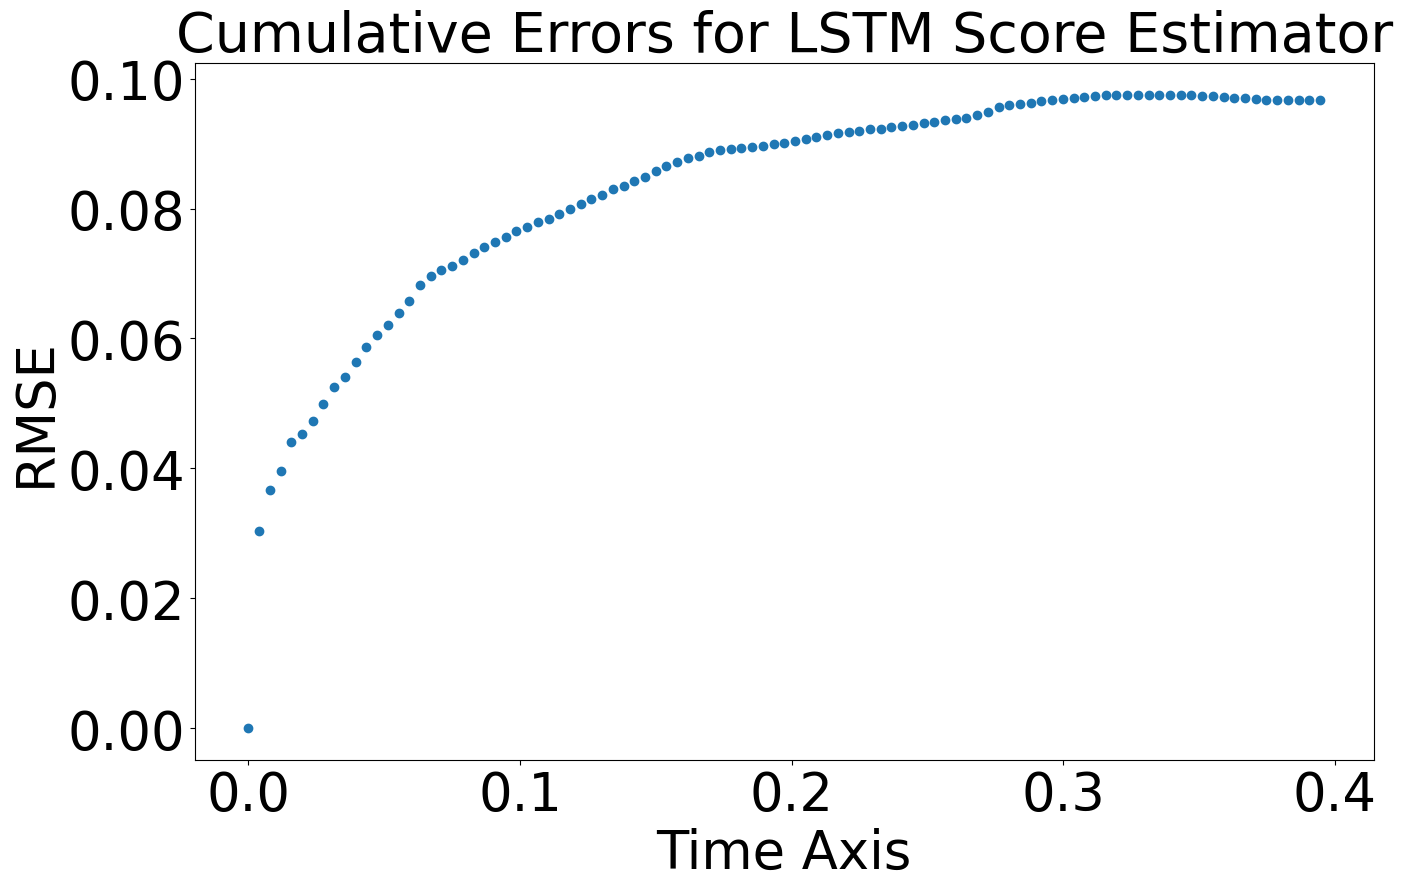

In [ ]:
for epoch in config.max_epochs:
    try:
        plot_errors(config=config, Nepoch=epoch)
    except FileNotFoundError as e:
        continue